# Assignment 6
## Tree-based approaches
Author: Samuel Fredric Berg

Student ID: sb224sc

Date: 2026-01-26

Course: Machine Learning 4DT905

### Conceptual

1. **Bagging** focuses on reducing the variance. Trains several models in parallel and independently on different subsets of the data. These trees are deep, complex and avraging them to "smooth out" the overfit.  Meanwhile **Boosting** focuses on reducing bias. Trains models sequentially, where each model tries to correct the errors of the previous one. Also uses shallow trees and stack them to learn complex patterns with time. By creating a forest of slightly different trees cancels out the noise in the data. Using **Bootstrapping** to ensure diversity among the trees. 

2. 
- **Random Forests**:
    - Parallel training
    - Equal weighting
    - Every tree get one equal vote
    - Very robust to overfitting
- **AdaBoost**:
    - Sequential training
    - Dynamic weighting, higherweight prioritized next iteration
    - More accurate tree the more influence
    - Sensitive to noisy data and outliers

### Practical

#### Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### Load Data

In [4]:
df = pd.read_csv("../data/Carseats.csv", index_col=0)

#### Number of features and names

In [5]:
df_names = df.columns.tolist()
print(f"Number of columns: {len(df_names)}")
print(f"Column names: {df_names}")

Number of columns: 11
Column names: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


#### Statistatical summary of features

In [6]:
print(df.describe())
print(df["ShelveLoc"].value_counts())
print(df["Urban"].value_counts())
print(df["US"].value_counts())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

#### Number of datapoints

In [7]:
print(f"Number of datapoints: {len(df)}")

Number of datapoints: 400


#### Display data in table format

In [8]:
print(df.head(5))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1   9.50        138      73           11         276    120       Bad   42   
2  11.22        111      48           16         260     83      Good   65   
3  10.06        113      35           10         269     80    Medium   59   
4   7.40        117     100            4         466     97    Medium   55   
5   4.15        141      64            3         340    128       Bad   38   

   Education Urban      US  
1         17   Yes     Yes  
2         10   Yes     Yes  
3         12   Yes  Yes     
4         14   Yes     Yes  
5         13   Yes      No  


##### Correlation matrix

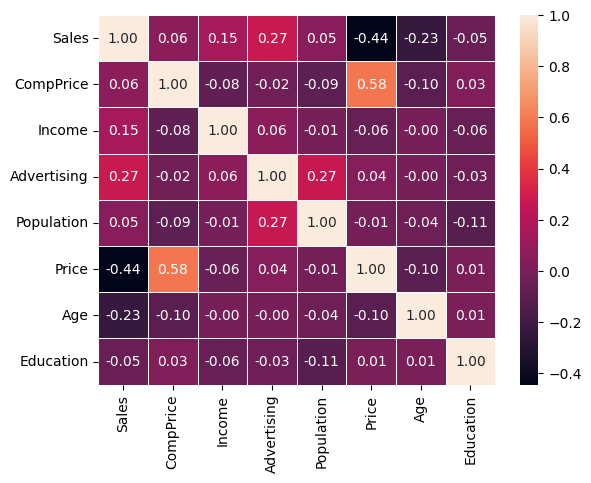

In [9]:
sns.heatmap(
    df.drop(columns=["ShelveLoc", "Urban", "US"]).corr(),
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.show()

#### Scatter plot

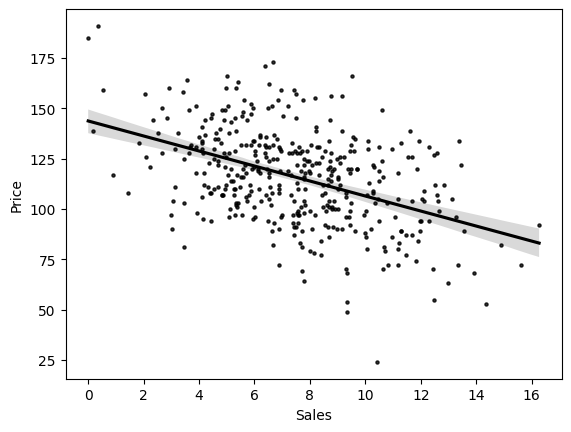

In [10]:
sns.regplot(
    x="Sales",
    y="Price",
    data=df,
    scatter_kws={"s": 5, "color": "black"},
    line_kws={"color": "black"},
)
plt.show()

##### Interpretation
We are looking at "Sales" as our response variable and the most correlated feature is "Price". The correlation is negative, meaning that as the price increases, the sales decrease. Also means that is the price decreases the sales increase. The second most correlated feature is "Advertising", which has a positive correlation with sales. This means that as advertising increases, sales also increase.
The least correlated features are "Population" and "Education".

In [11]:
df_encoded = pd.get_dummies(df, columns=["ShelveLoc", "Urban", "US"])
df["High"] = ["No" if sales <= 8 else "Yes" for sales in df["Sales"]]

X = df_encoded.drop(columns=["Sales"])
Y = df["High"]

tree = DecisionTreeClassifier()
tree.fit(X, Y)

print(f"Number of leaves: {tree.get_n_leaves()}")

Number of leaves: 61


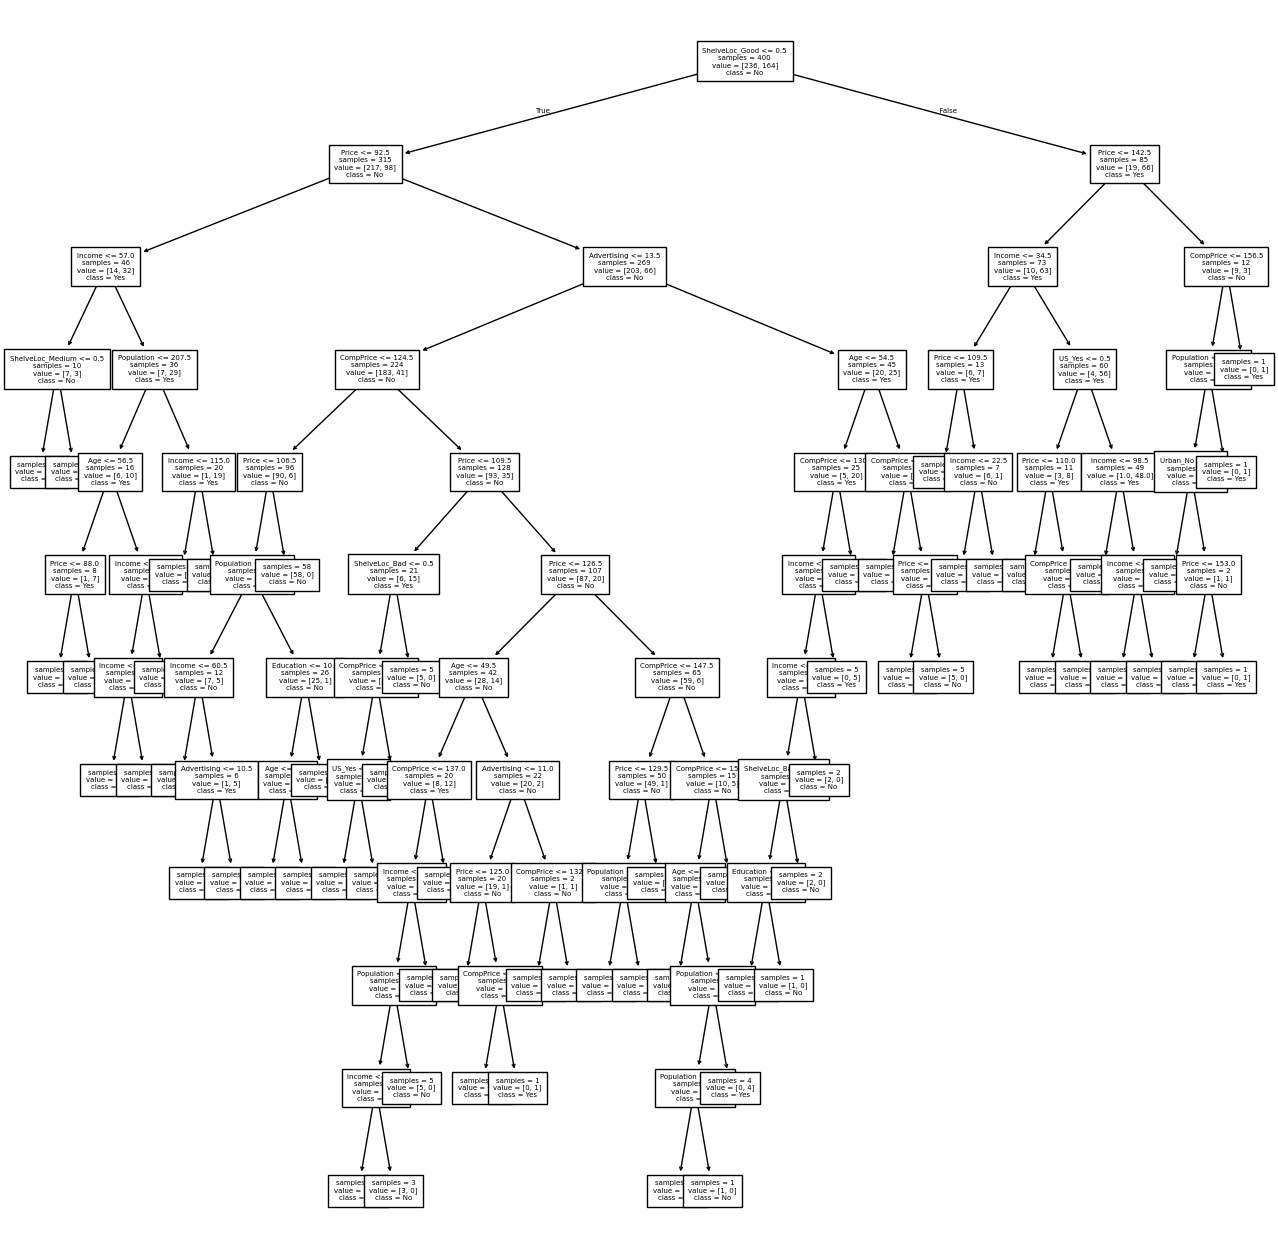

In [20]:
plt.figure(figsize=(16, 16))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    impurity=False,
    fontsize=5,
)
plt.show()

##### Interpretation
Each node in the tree represents a feature and a threshold value, if the threshold is met the left branch is followed, otherwise the right branch. When it raches the bottom of the tree it returns an answer (if "High" is Yes or No).

In [21]:
df_encoded = pd.get_dummies(df, columns=["ShelveLoc", "Urban", "US"], drop_first=True)
X = df_encoded.drop(columns=["Sales", "High"])
Y = df["High"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print(conf_matrix)

[[94 25]
 [30 51]]


##### Interpretation
$$
\begin{bmatrix}
\text{True Negative (TN)} & \text{False Positive (FP)} \\
\text{False Negative (FN)} & \text{True Positive (TP)}
\end{bmatrix}
=
\begin{bmatrix}
94 & 25 \\
30 & 51
\end{bmatrix}
$$

$$
Precision = \frac{TP}{TP + FP} = \frac{51}{51 + 25} \approx 0.6710
$$

$$
Recall = \frac{TP}{TP + FN} = \frac{51}{51 + 30} \approx 0.6296
$$

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{51 + 94}{51 + 94 + 25 + 30} \approx 0.7250
$$

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{0.6710 \cdot 0.6296}{0.6710 + 0.6296} \approx 0.6496
$$

This indicates a precision of 67.10%, a recall of 62.96%, an accuracy of 72.50% and this gives us an F1-score of 64.96%.

In [26]:
path = tree_model.cost_complexity_pruning_path(X_train, Y_train)

cv_scores = []
best_accuracy = 0.0
best_alpha = 0.0
for alpha in path.ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree, X_train, Y_train, cv=5)
    accuracy = scores.mean()
    cv_scores.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print(f"Best accuracy: {best_accuracy:.4f}, with alpha: {best_alpha:.4f}")

Best accuracy: 0.7100, with alpha: 0.0128


##### Interpretation
Pruning reduces the accuracy form 72.5% to 71.00%. Meaning the pruned tree is less accurate than the unpruned tree.

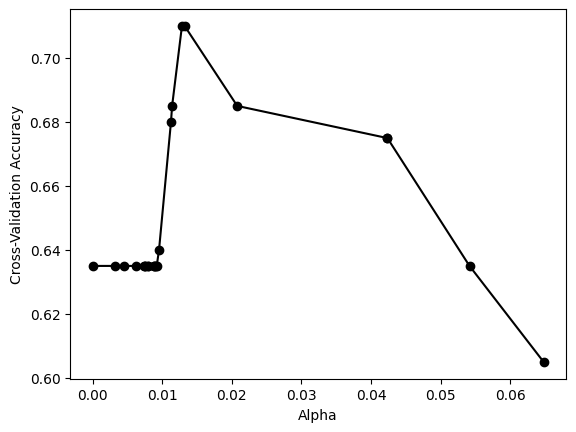

In [27]:
plt.plot(path.ccp_alphas, cv_scores, marker="o", color="black")
plt.xlabel("Alpha")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

##### Interpretation
Previous result in graph form which indicates that at alpha 0.0128 provides us with an accuracy of 71.00%.

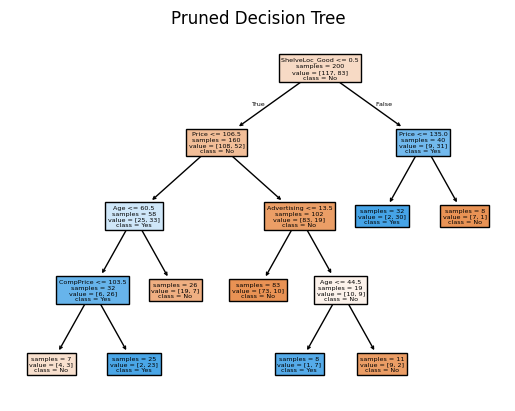

In [28]:
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, Y_train)

plot_tree(
    pruned_tree,
    filled=True,
    feature_names=X_train.columns,
    class_names=["No", "Yes"],
    impurity=False,
)
plt.title("Pruned Decision Tree")
plt.show()

In [29]:
Y_pred = pruned_tree.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[100  19]
 [ 36  45]]


##### Interpretation
Results in the same accuracy as before (72.50%) with a more interpretable tree. 

[[98 21]
 [33 48]]


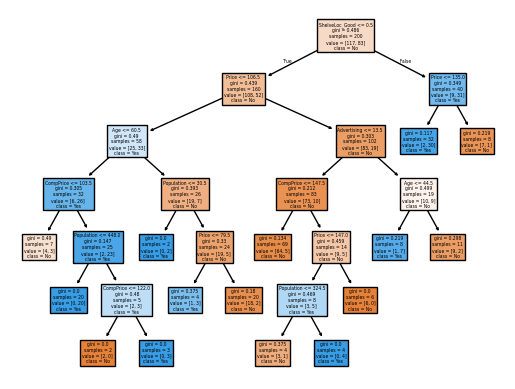

In [31]:
best_alpha = 0.0
for alpha in path.ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    pruned_tree.fit(X_train, Y_train)
    if pruned_tree.get_n_leaves() <= 18:
        best_alpha = alpha
        break

pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, Y_train)
Y_pred = pruned_tree.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print(conf_matrix)

plt.figure()
plot_tree(
    pruned_tree, filled=True, feature_names=X_train.columns, class_names=["No", "Yes"]
)
plt.show()

##### Interpretation
Now we are seeing improved accuracy to 73.00%

#### Load Data pt2

In [32]:
df = pd.read_csv("../data/Boston.csv", index_col=0)

#### Regression tree

In [33]:
X = df.drop(columns=["medv"])
Y = df["medv"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=7)
tree.fit(X_train, Y_train)

print(f"Number of leaves: {tree.get_n_leaves()}")
print(f"Tree Depth: {tree.get_depth()}")
print(f"Residual Mean Deviance: {tree.tree_.impurity.mean():.4f}")

Number of leaves: 7
Tree Depth: 4
Residual Mean Deviance: 26.0916


#### Plot Tree

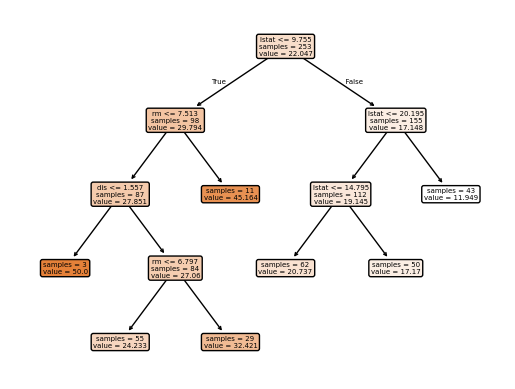

In [35]:
plot_tree(
    tree, filled=True, feature_names=X.columns, impurity=False, rounded=True, fontsize=5
)
plt.show()

##### Interpretation
Residual mean deviance is a measure of how well the regression tree fits the data. The value of 26.09 indicates that on average the squared difference between the predicted and actual values is 26.09. A lower value would indicate a better fit.

Best Error: 17.9246, with alpha: 1.3920


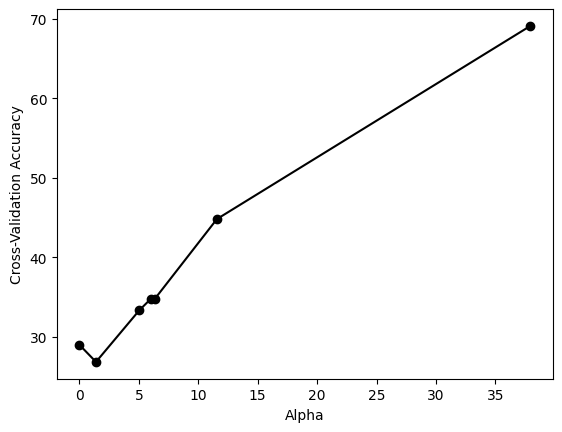

In [36]:
path = tree.cost_complexity_pruning_path(X_train, Y_train)

cv_scores = []
best_accuracy = float("inf")
best_alpha = 0.0
for alpha in path.ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    scores = -cross_val_score(
        pruned_tree, X_train, Y_train, cv=5, scoring="neg_mean_squared_error"
    )
    accuracy = scores.mean()
    cv_scores.append(accuracy)
    if accuracy < best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, Y_train)
Y_pred = pruned_tree.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)

print(f"Best Error: {MSE:.4f}, with alpha: {best_alpha:.4f}")

plt.plot(path.ccp_alphas, cv_scores, marker="o", color="black")
plt.xlabel("Alpha")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

##### Interpretation
An error of 17.92 (with pruning) is an improvement compared to earlier.

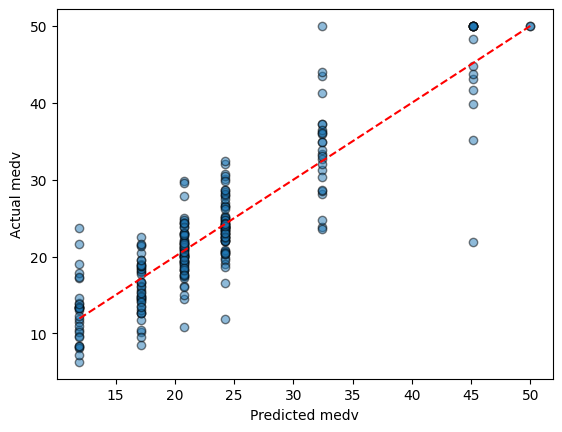

Mean Squared Error: 17.9246


In [51]:
Y_hat = tree.predict(X_test)

plt.figure()
plt.scatter(Y_hat, Y_test, alpha=0.5, edgecolors="k")
plt.plot(
    [min(Y_hat), max(Y_hat)], [min(Y_pred), max(Y_pred)], color="red", linestyle="--"
)
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.show()

MSE = np.mean((Y_hat - Y_test) ** 2)

print(f"Mean Squared Error: {MSE:.4f}")

##### Interpretation
It follows the the actual values decently well, with the Mean Squared Error (MSE) of 17.92 after pruning.

#### Reggression Bagging & Random Forests

Mean Squared Error: 11.7347
R-squared: 86.63%


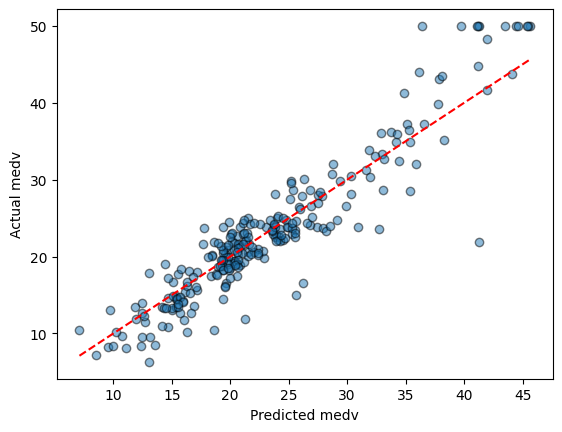

In [41]:
random_forest = RandomForestRegressor(n_estimators=500, max_features=13, random_state=1)
random_forest.fit(X_train, Y_train)

Y_hat_bag = random_forest.predict(X_test)
MSE_bag = mean_squared_error(Y_test, Y_hat_bag)
r_squared = r2_score(Y_test, Y_hat_bag)

print(f"Mean Squared Error: {MSE_bag:.4f}")
print(f"R-squared: {100 * r_squared:.2f}%")

plt.figure()
plt.scatter(Y_hat_bag, Y_test, alpha=0.5, edgecolors="k")
plt.plot(
    [min(Y_hat_bag), max(Y_hat_bag)],
    [min(Y_hat_bag), max(Y_hat_bag)],
    color="red",
    linestyle="--",
)
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.show()

##### Interpretation
Better Mean Squared Error (MSE) of 11.49 compared to the previous tree.

In [42]:
random_forest = RandomForestRegressor(n_estimators=25, max_features=13, random_state=1)
random_forest.fit(X_train, Y_train)

Y_hat_bag = random_forest.predict(X_test)
MSE_bag = mean_squared_error(Y_test, Y_hat_bag)
r_squared = r2_score(Y_test, Y_hat_bag)

print(f"Mean Squared Error: {MSE_bag:.4f}")
print(f"R-squared: {100 * r_squared:.2f}%")

Mean Squared Error: 13.2764
R-squared: 84.87%


##### Interpretation
This Mean Squared Error of 13.27 is worse than the previously due to less parameters being used in the model.

Mean Squared Error: 11.7343
R-squared: 86.63%


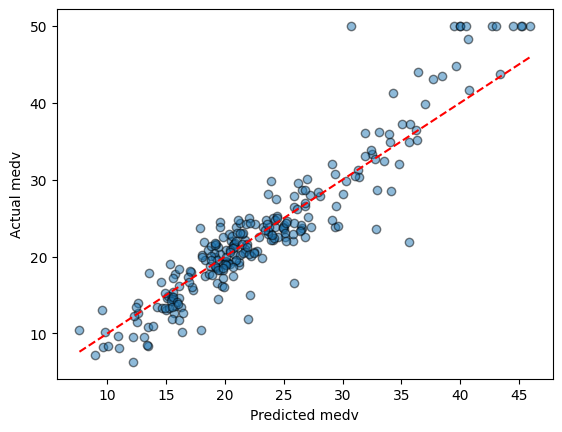

In [ ]:
random_forest = RandomForestRegressor(n_estimators=500, max_features=6, random_state=1)
random_forest.fit(X_train, Y_train)

Y_hat_bag = random_forest.predict(X_test)
MSE_bag = mean_squared_error(Y_test, Y_hat_bag)
r_squared = r2_score(Y_test, Y_hat_bag)

print(f"Mean Squared Error: {MSE_bag:.4f}")
print(f"R-squared: {100 * r_squared:.2f}%")

plt.figure()
plt.scatter(Y_hat_bag, Y_test, alpha=0.5, edgecolors="k")
plt.plot(
    [min(Y_hat_bag), max(Y_hat_bag)],
    [min(Y_hat_bag), max(Y_hat_bag)],
    color="red",
    linestyle="--",
)
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.show()

##### Interpretation
Similar MSE as before but not the same.

Feature Importances:
lstat: 0.3789
rm: 0.2739
dis: 0.0660
indus: 0.0601
crim: 0.0576
nox: 0.0571
ptratio: 0.0302
age: 0.0277
tax: 0.0182
black: 0.0180
rad: 0.0059
zn: 0.0047
chas: 0.0016


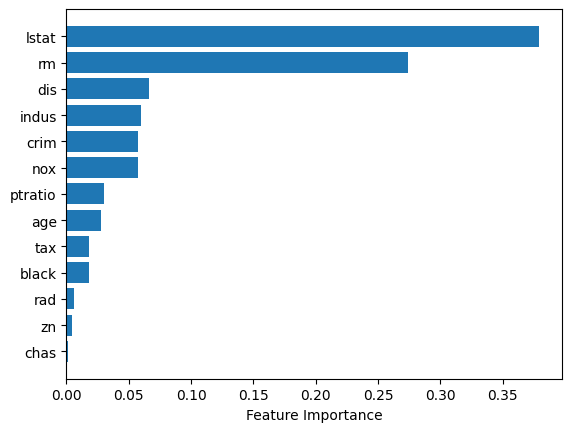

In [45]:
feat_importance = random_forest.feature_importances_

sorted_indices = np.argsort(feat_importance)[::-1]
feat_names = X.columns

print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feat_names[idx]}: {feat_importance[idx]:.4f}")

plt.figure()
plt.barh(range(len(feat_importance)), feat_importance[sorted_indices], align="center")
plt.yticks(range(len(feat_importance)), np.array(feat_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

##### Interpretation
The graph indicates that the `lstat` is the most important or influential feature when predicting, meanwhile `chas` is the least important feature.

lstat: 0.5136
rm: 0.2772
dis: 0.0851
crim: 0.0398
ptratio: 0.0266
tax: 0.0164
nox: 0.0159
black: 0.0117
age: 0.0063
indus: 0.0048
rad: 0.0018
chas: 0.0007
zn: 0.0000


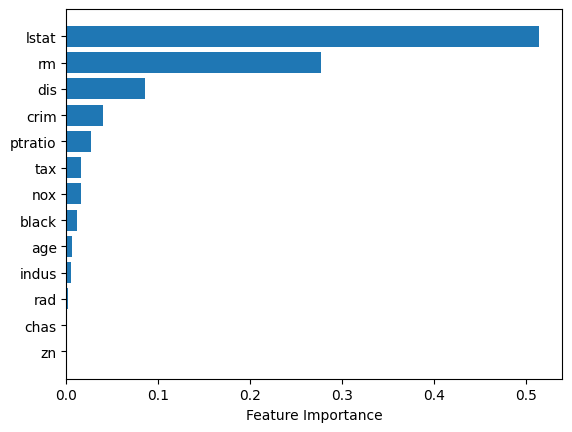

In [46]:
grad_boost = GradientBoostingRegressor(
    loss="squared_error", n_estimators=5000, learning_rate=0.001, random_state=1
)
grad_boost.fit(X_train, Y_train)
feat_importance = grad_boost.feature_importances_
sorted_indices = np.argsort(feat_importance)[::-1]
feat_names = X.columns

for idx in sorted_indices:
    print(f"{feat_names[idx]}: {feat_importance[idx]:.4f}")

plt.figure()
plt.barh(range(len(feat_importance)), feat_importance[sorted_indices], align="center")
plt.yticks(range(len(feat_importance)), np.array(feat_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

##### Interpretation
Same as before, but `zn` is now the least important feature.

In [48]:
Y_hat = grad_boost.predict(X_test)
MSE_grad_boost = mean_squared_error(Y_test, Y_hat)

print(f"Mean Squared Error: {MSE_grad_boost:.4f}")

Mean Squared Error: 11.0007


##### Interpretation
Slight improvement in the Mean Squared Error to 11.00. Problably need a significance test if it is significant.

lstat: 0.5015
rm: 0.2780
dis: 0.0971
crim: 0.0363
ptratio: 0.0259
black: 0.0159
nox: 0.0143
tax: 0.0117
age: 0.0099
indus: 0.0059
rad: 0.0027
zn: 0.0006
chas: 0.0004


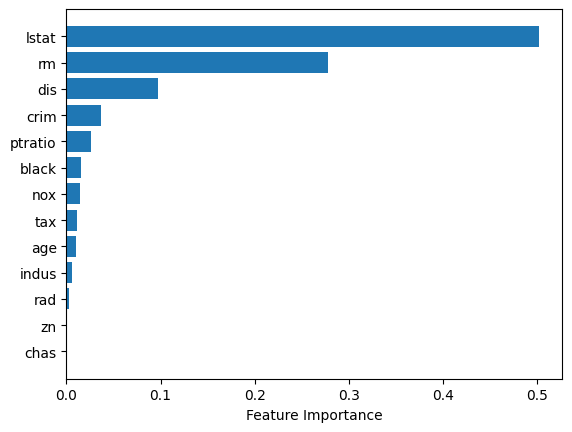

Mean Squared Error: 11.0775


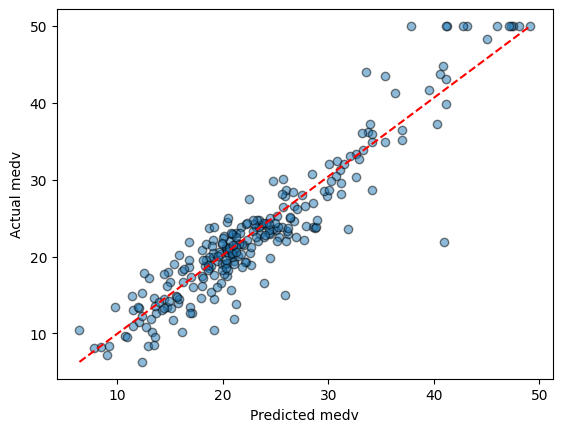

In [50]:
grad_boost = GradientBoostingRegressor(
    loss="squared_error", n_estimators=5000, learning_rate=0.2, random_state=1
)
grad_boost.fit(X_train, Y_train)
feat_importance = grad_boost.feature_importances_
sorted_indices = np.argsort(feat_importance)[::-1]
feat_names = X.columns

for idx in sorted_indices:
    print(f"{feat_names[idx]}: {feat_importance[idx]:.4f}")

plt.figure()
plt.barh(range(len(feat_importance)), feat_importance[sorted_indices], align="center")
plt.yticks(range(len(feat_importance)), np.array(feat_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Y_hat = grad_boost.predict(X_test)
MSE_grad_boost = mean_squared_error(Y_test, Y_hat)

print(f"Mean Squared Error: {MSE_grad_boost:.4f}")

plt.figure()
plt.scatter(Y_hat, Y_test, alpha=0.5, edgecolors="k")
plt.plot(
    [min(Y_hat), max(Y_hat)], [min(Y_test), max(Y_test)], color="red", linestyle="--"
)
plt.xlabel("Predicted medv")
plt.ylabel("Actual medv")
plt.show()

##### Interpretation
The change of the learing rate to 0.02 resulted in a worse score. The above scatter plot shows the predicted vs actual values.